![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)

# Proyecto: Innovación Tecnológica en Bodoque Bank

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Pablo Badilla, Ignacio Meza De La Jara
- Auxiliar: Sebastián Tinoco
- Ayudante: Diego Cortez M., Felipe Arias T.

*Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir.*




# Proyecto

### Equipo:

- Germán Urrea
- Antonia Villegas


### Link de repositorio de GitHub: `https://github.com/G-Urrea/labs_mds-german-antonia>`




## 1. Introducción


El banco **Bodoque Bank**, del famoso empresario Juan Carlos Bodoque, quiere detectar a posibles clientes fraudulentos. Es por esta razón que proporciona un dataset con información sobre sus clientes y su actividad bancaria reciente, sin exponer ningún tipo de información personal delicada de forma explicita.

Los datos de entrada se dividen entre 3 archivos. Dos de de estos archivos contienen el mismo tipo de información, correspondiente a caracteristicas generales de los clientes y su actividad bancaria. El tercer archivo contiene datos sobre la información de contacto de los clientes.

Para abordar este problema primero hay que unificar los archivos y limpiar los datos para crear una base de datos apta para el trabajo. Posteriormente se debe realizar una exploración y comprensión sobre los datos, para poder identificar patrones y tendencias relevantes en los datos. Por último, a partir del paso anterior, se definirán métodos de detección de clientes fraudulentos.

## 2. Lectura y Manejo de Datos




### 2.1 Cargar datos en dataframes

In [ ]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

El primer paso es leer los datos, para ello de opta por leer los datos directamente desde su fuente en internet y cargarlos en dataframes.

In [ ]:
# To do: Código para descargar datos si no se encuentran en local (y así no leer desde internet a cada rato (?))
# Obtener datos directamente de repos
df_1 = pd.read_parquet('https://gitlab.com/imezadelajara/datos_proyecto_1_mds7202/-/raw/main/df_1.parquet')
df_2 = pd.read_parquet('https://gitlab.com/imezadelajara/datos_proyecto_1_mds7202/-/raw/main/df_2.parquet')
df_email_phone = pd.read_parquet('https://gitlab.com/imezadelajara/datos_proyecto_1_mds7202/-/raw/main/df_email_phone.parquet')

### 2.2 Exploración inicial

Una vez cargados los datos en dataframes, se procede a realizar una exploración superficial de estos. La exploración consiste principalmente en revisar las columnas, número de entradas, y una pequeña muestra de cada dataframe.

In [ ]:
print(df_1.info())
df_1.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389782 entries, 104446 to 193209
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            389782 non-null  int64  
 1   fraud_bool                    389782 non-null  int64  
 2   income                        389782 non-null  float64
 3   prev_address_months_count     389782 non-null  int64  
 4   current_address_months_count  389782 non-null  int64  
 5   customer_age                  389782 non-null  int64  
 6   days_since_request            389782 non-null  float64
 7   intended_balcon_amount        389782 non-null  float64
 8   payment_type                  389782 non-null  object 
 9   zip_count_4w                  389782 non-null  int64  
 10  velocity_6h                   389782 non-null  float64
 11  velocity_24h                  389782 non-null  float64
 12  velocity_4w                   389782 no

,id,fraud_bool,income,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_fraud_count,month,x1,x2
104446,729517,0,0.7,-1,305,60,0.030059,-1.599455,AC,990,...,500.0,0,INTERNET,8.865992,windows,0,0,2,-0.245425,0.568811
269483,149585,0,0.8,-1,140,50,0.015659,3.951994,AA,1269,...,200.0,0,INTERNET,4.654872,linux,1,0,7,0.009336,-2.096682
4102,64486,0,0.9,-1,171,50,0.001409,28.159779,AB,4430,...,1500.0,0,INTERNET,3.720953,linux,1,0,1,2.229616,-0.005823
351767,825283,0,0.5,-1,85,30,0.027292,-1.310498,AB,1698,...,200.0,0,INTERNET,2.912670,windows,1,0,3,-0.193945,0.861207
126377,8308,0,0.9,-1,39,30,0.010945,-1.450972,AC,569,...,200.0,0,INTERNET,2.283680,other,1,0,3,-2.440650,0.354986


In [ ]:
print(df_2.info())
df_2.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747410 entries, 699954 to 384611
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            747410 non-null  int64  
 1   fraud_bool                    747410 non-null  int64  
 2   income                        747410 non-null  float64
 3   prev_address_months_count     747410 non-null  int64  
 4   current_address_months_count  747410 non-null  int64  
 5   customer_age                  747410 non-null  int64  
 6   days_since_request            747410 non-null  float64
 7   intended_balcon_amount        747410 non-null  float64
 8   payment_type                  747410 non-null  object 
 9   zip_count_4w                  747410 non-null  int64  
 10  velocity_6h                   747410 non-null  float64
 11  velocity_24h                  747410 non-null  float64
 12  velocity_4w                   747410 no

,id,fraud_bool,income,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_fraud_count,month,x1,x2
699954,303612,0,0.8,-1,21,40,0.010837,-0.853976,AD,239,...,200.0,0,INTERNET,48.127390,other,0,0,3,0.236931,0.077061
701206,568066,0,0.9,-1,70,50,0.711485,25.137456,AA,1873,...,200.0,0,INTERNET,8.792273,windows,1,0,3,0.571536,1.151563
270304,893344,0,0.7,-1,133,50,0.006856,-0.815330,AC,675,...,1000.0,0,INTERNET,15.916225,other,1,0,7,0.224252,-0.590459
346538,247688,0,0.8,-1,207,50,0.026194,-0.736615,AB,999,...,200.0,0,INTERNET,0.509942,linux,1,0,6,0.648528,-0.315911
147297,674478,0,0.8,-1,24,50,0.012646,10.744253,AA,3198,...,500.0,1,INTERNET,10.562945,other,0,0,6,0.041475,0.383332


De la exploración inicial, es evidente que los primeros dos dataframes contienen las mismas caracteristicas generales sobre clientes. Esta información es principalmente númerica, contando con algunas variables categoricas.

El primer dataframe contiene alrededor de 389k filas, mientras que el segundo contiene alrededor de 747 k filas. Ambos tienen 28 caracteristicas que describen información general sobre el comportamiento del cliente en el ámbito financiero, además de un identificador para cada uno de estos. 

In [ ]:
print(df_email_phone.info())
df_email_phone.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934730 entries, 987231 to 986114
Data columns (total 7 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id                                934730 non-null  int64  
 1   name_email_similarity             934730 non-null  float64
 2   date_of_birth_distinct_emails_4w  934730 non-null  int64  
 3   email_is_free                     934730 non-null  int64  
 4   device_distinct_emails_8w         934730 non-null  int64  
 5   phone_home_valid                  934730 non-null  int64  
 6   phone_mobile_valid                934730 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 57.1 MB
None


,id,name_email_similarity,date_of_birth_distinct_emails_4w,email_is_free,device_distinct_emails_8w,phone_home_valid,phone_mobile_valid
987231,624588,0.555653,15,0,1,0,1
79954,620810,0.849718,2,0,1,0,0
567130,580633,0.110898,3,0,1,1,0
500891,6379,0.671250,15,0,1,0,1
55399,366511,0.772932,7,0,1,0,1


Respecto al tercer dataframe, este posee alrededor de 935k entradas y 6 caracteristicas numericas sobre la información de contacto de los clientes, principalmente email y telefono, además de un identificador para cada cliente.

Es de notar que ninguno de estos dataframes por sí sólo posee valores nulos, dado que en los 3 el número de no nulos para cada columna coincide con el número total de filas.

### 2.3 Unir dataframes

Para poder realizar una exploración y estudio completos es necesario unir las 3 fuentes de información en una sola.

Para unir los primeros 2 dataframes basta con una concatenación de estos por el lado de las filas (manteniendo número de columnas).

In [ ]:
df_customers = pd.concat([df_1, df_2])

In [ ]:
print('Dimensiones de dataframes')
print(f"df_1:\t\t {df_1.shape}")
print(f"df_2:\t\t {df_2.shape}")
print(f"df_customers:\t {df_customers.shape}")

Dimensiones de dataframes
df_1:		 (389782, 29)
df_2:		 (747410, 29)
df_customers:	 (1137192, 29)


In [ ]:
df_email_phone.dtypes

id                                    int64
name_email_similarity               float64
date_of_birth_distinct_emails_4w      int64
email_is_free                         int64
device_distinct_emails_8w             int64
phone_home_valid                      int64
phone_mobile_valid                    int64
dtype: object

### 2.4 Unir nuevas variables

Para unir el dataframe de la unión anterior con las caracteristicas presentes en el dataframe de datos de contacto, se utilizará la función `merge` de pandas, uniendo las entradas a través del campo `id`.

In [ ]:
print('Dimensiones antes de merge')
shape_bf_merge = df_customers.shape
print(f'df_customers:\t{df_customers.shape}')
print(f'df_email:\t{df_email_phone.shape}\n')

df_customers = pd.merge(df_customers, df_email_phone, on='id', how = 'outer')

print('Dimensiones después de merge')
shape_af_merge = df_customers.shape
print(f'df_customers:\t{df_customers.shape}\n')
print(f'Diferencia en filas:{shape_af_merge[0]-shape_bf_merge[0]}')

Dimensiones antes de merge
df_customers:	(1137192, 29)
df_email:	(934730, 7)

Dimensiones después de merge
df_customers:	(1198151, 35)

Diferencia en filas:60959


### 2.5 Verificar nulos y duplicados, generar explicaciones sobre sus fuentes y proponer soluciones.



Para asegurar que cualquier trabajo posterior se realice con datos que sigan un estándar de calidad mínimo, se estudiará la existencia de nulos y duplicados en el dataframe combinado.

Primero se verificará el número de NAN en cada columna

In [ ]:
df_customers.isna().sum()

id                                      0
fraud_bool                          60959
income                              60959
prev_address_months_count           60959
current_address_months_count        60959
customer_age                        60959
days_since_request                  60959
intended_balcon_amount              60959
payment_type                        60959
zip_count_4w                        60959
velocity_6h                         60959
velocity_24h                        60959
velocity_4w                         60959
bank_branch_count_8w                60959
employment_status                   60959
credit_risk_score                   60959
housing_status                      60959
bank_months_count                   60959
has_other_cards                     60959
proposed_credit_limit               60959
foreign_request                     60959
source                              60959
session_length_in_minutes           60959
device_os                         

Hay un patrón en el número de NAN. No hay Ids nulos, lo que quiere decir que al menos todas las entradas tienen un identificador válido. Por otro lado todas las caracteristicas relacionadas a los ejemplos inicales tienen alrededor de 61k valores nulos, mientras que para cada una de las nuevas cararcteristicas hay casi 80k de valores nulos. 

Es muy posible que, al tener valores de nulos uniformemente distribuidos, todos estos se encuentren en las mismas filas. La causa más probable es que los nulos se hayan dado al realizar el merge con el dataframe de datos de emails:
-  Dado que el dataframe de emails sólo poseía caracteristicas nuevas, se crearon nulos para las caracteristicas generales en aquellas entradas cuyos `id` que estaban en el dataframe de emails, pero no en el de caracteristicas generales.
- De forma similar, se crearon datos nulos para las nuevas caracteristicas de clientes que, teniendo entradas en el dataset general, no poseían información en el dataset de emails.



Ahora se revisará el número de duplicados, basandose en el campo identificador `id`

In [ ]:
duplicates = df_customers.duplicated(subset=['id'])
n_duplicated = duplicates.sum()
print(f"Existen {n_duplicated} filas con identificadores duplicados.")

Existen 202334 filas con identificadores duplicados.


In [ ]:
print('Ejemplos de filas duplicadas:')
display(df_customers.loc[duplicates].sort_values(by=['id']).head(10))

Ejemplos de filas duplicadas:


,id,fraud_bool,income,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,device_fraud_count,month,x1,x2,name_email_similarity,date_of_birth_distinct_emails_4w,email_is_free,device_distinct_emails_8w,phone_home_valid,phone_mobile_valid
79730,10,0.0,0.7,-1.0,269.0,50.0,0.017052,18.113431,AA,1008.0,...,0.0,7.0,0.819086,0.995956,0.409915,5.0,0.0,1.0,1.0,1.0
63988,14,0.0,0.9,-1.0,38.0,40.0,0.011142,-0.700248,AB,999.0,...,0.0,1.0,-1.204976,-0.460171,0.925234,9.0,1.0,1.0,0.0,1.0
494431,19,0.0,0.5,-1.0,18.0,50.0,0.006434,-1.351873,AB,705.0,...,0.0,7.0,1.017089,-0.557888,0.401173,13.0,0.0,1.0,1.0,0.0
494430,19,0.0,0.5,-1.0,18.0,50.0,0.006434,-1.351873,AB,705.0,...,0.0,7.0,1.017089,-0.557888,0.401173,13.0,0.0,1.0,1.0,0.0
630239,37,0.0,0.8,-1.0,22.0,30.0,0.018731,24.369254,AA,591.0,...,0.0,7.0,0.961786,1.756209,NaN,NaN,NaN,NaN,NaN,NaN
630240,37,0.0,0.8,-1.0,22.0,30.0,0.018731,24.369254,AA,591.0,...,0.0,7.0,0.961786,1.756209,NaN,NaN,NaN,NaN,NaN,NaN
443211,39,0.0,0.1,-1.0,189.0,30.0,0.001039,-0.576867,AB,1644.0,...,0.0,3.0,1.620199,0.132025,0.868037,8.0,1.0,1.0,0.0,1.0
443210,39,0.0,0.1,-1.0,189.0,30.0,0.001039,-0.576867,AB,1644.0,...,0.0,3.0,1.620199,0.132025,0.868037,8.0,1.0,1.0,0.0,1.0
443209,39,0.0,0.1,-1.0,189.0,30.0,0.001039,-0.576867,AB,1644.0,...,0.0,3.0,1.620199,0.132025,0.868037,8.0,1.0,1.0,0.0,1.0
840268,55,0.0,0.6,-1.0,216.0,60.0,0.022977,-0.601287,AB,1126.0,...,0.0,7.0,1.643214,1.155003,0.387457,3.0,0.0,1.0,1.0,1.0


Es interesante de notar que las filas con id duplicados, también poseen la fila entera duplicados. Los valores duplicados pueden deberse, ya sea por imperfecciones en los dataframe base, o por la concatenación de los dataframes de caracteristicas generales, dado que estos dos no necesariamente poseían entradas disjuntas entre ellos.

#### Estrategia de limpieza

Para eliminar las imperfecciones en la unión final, bastaría con seguir los siguientes pasos:
- Deshacerse de cualquier fila con al menos un NAN
- Deshacerse de cualquier entrada con `id` duplicado, dejando sólo un ejemplar.

Siguiendo estos pasos el dataframe final ya no tendría ni valores nulos ni duplicados, a cambio de perder una cantidad significativa de entradas.

### 2.6 Limpiar

In [ ]:
# Limpiar nans
df_customers = df_customers.dropna()
# Limpiar duplicados
df_customers = df_customers.drop_duplicates(subset=['id'])

In [ ]:
# Verificar Nan
df_customers.isna().sum()

id                                  0
fraud_bool                          0
income                              0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
employment_status                   0
credit_risk_score                   0
housing_status                      0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_length_in_minutes           0
device_os                           0
keep_alive_session                  0
device_fraud_count                  0
month       

In [ ]:
# Verificar duplicados
df_customers.duplicated(subset=['id']).sum()

0

In [ ]:
print('Después de la limpieza')
print(f'df_customers:\t{df_customers.shape}')
print(f'Cantidad de filas limpiadas: {shape_af_merge[0]-df_customers.shape[0]}')

Después de la limpieza
df_customers:	(873771, 35)
Cantidad de filas limpiadas: 324380


Como resultado de la limpieza, ya no quedan entradas con valores nulos o duplicados, a cambio de esto se perdieron alrededor de 324k entradas, sin embargo, estas eran entradas que no serían de gran aporte en el estudio final debido a sus carencias.

### 2.7 Segmentación etaria

Ya con los datos limpios, se realizará una segmentación etaria para apoyar la exploración y estudio de los datos, esto creando una columna categorica en base a la edad presente en la columna `customer_age`. A continuación se presenta la clasificación que seguirá la columna:
- Joven: Edad menor a 18
- Adulto-Joven: Entre 18 a 26 años
- Adulto: Entre 27 y 59 años
- Persona mayor: 60 años o más

In [ ]:
def categorize_by_age(age):
  ranges = {
    'Joven': (0, 17),
    'Adulto-Joven': (18, 26),
    'Adulto': (27, 59),
    'Persona Mayor': (60, 120)
    }
  for range in ranges:
    pair = ranges[range]
    lower = pair[0]
    upper = pair[1]
    if age>=lower and age<=upper:
      return range
      
  # Si por alguna razón nos pasamos, aquí hay algo raro 
  return 'No válida'

In [ ]:
df_customers['segmentacion_etaria'] = df_customers['customer_age'].apply(categorize_by_age)

In [ ]:
print(f"Rangos creados: {df_customers['segmentacion_etaria'].unique()}")
df_customers[['segmentacion_etaria','customer_age']].sample(5)

Rangos creados: ['Persona Mayor' 'Adulto' 'Adulto-Joven' 'Joven']


,segmentacion_etaria,customer_age
169784,Adulto,40.0
226135,Persona Mayor,80.0
781257,Adulto,40.0
733060,Adulto,50.0
279116,Adulto,40.0


## 3. Análisis Exploratorio de Datos

Para realizar un análisis exploratorio más profundo de los datos, se hará uso de la librería `ydata_profiling`, capaz de generar reportes sobre conjuntos de datos.

In [ ]:
!pip install ydata_profiling

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_customers, title="EDA")
profile.to_file("eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 3.1 Análisis del EDA

A partir del resumen creado por la librería `ydata_profiling`, se obtiene la siguiente información. Toda interpretación del significado de las variables se realiza a partir de la [información](https://github.com/feedzai/bank-account-fraud/blob/main/documents/datasheet.pdf) y [paper](https://arxiv.org/pdf/2211.13358.pdf) oficiales del dataset.

#### **Variables relacionadas a información personal**

- La variable `income` es una variable continua en el rango $[0.1,0.9]$, que indica el ingreso anual del cliente en cuantiles. Esta variable sigue una distribución en forma de arco, en el sentido de que la tendencia es hacia los valores extremos mientras que los intermedios aparecen con menor frecuencia, en particular, los ingresos tienden a los cuantiles más altos.

![income_histogram](https://drive.google.com/uc?id=1bHrTM4sR_2PtFv_fFdrz7tJnB6g3-tNe)
*Histograma para la variable `income`*

- La variable `prev_address_months_count` corresponde al número de meses en que el cliente estuvo en su residencia previa, contando con valores enteros desde el $-1$ en adelante, en donde $-1$ representa un valor nulo. La distribución se decanta por el valor $-1$, siendo este el valor con mayor frecuencia ($76.2\%$). Según la fuente oficial esto indica datos faltantes, lo que tiene sentido dado que una gran cantidad de clientes podría no tener una residencia previa, o simplemente no proveer dicha información.

![](https://drive.google.com/uc?id=1VgplWsDjbp6GB608R8FWBWu1ghrmD5mj)

*Resumen frecuencias para variable `prev_address_months_count`*

- La variable `current_address_months_count` es el equivalente a la variable anterior, pero considerando la residencia actual del cliente. En este caso particular, es interesante notar que la distribución presenta muy pocos valores nulos ($-1$), y que tiende a valores relativamente pequeños, presentando una tendencia (no monotona) al decrecimiento a medida que aumenta el número de meses.

![](https://drive.google.com/uc?id=1Gneu6T3jsHW3eNcP9uDtOGh1O82tQt6k)

*Histograma para variable `prev_address_months_count`*




- La variable `customer_age` corresponde a la edad del cliente redondeada a la decada. En este caso la distribución es casi estrictamente creciente hasta llegar a la mediana (50), y estrictamente decreciente para los valores mayores a esta. La mayor frecuencia de clientes se da en los 50 años, mientras que la menor se da en clientes menores de 20. Esto también se refleja en la variable derivada `segmentacion_etaria`, en donde la gran mayoría de clientes son adultos ($71.8\%$), mientras que una cantidad significativamente menor son jovenes (aproximadamente un $1\%$).


![customer_age_histogram](https://drive.google.com/uc?id=1-eJNi890CoBArtfGy-oPvka9IqJoEklX)
*Histograma para la variable `customer_age`*

- La variable `employment_status` es una variable categorica que indica el estado laboral del cliente de forma anonima, existiendo 7 posibles categorías (CA, CB, CC, etc). En este sentido, el estado CA es el más frecuente con una predominancia del $68.5\%$, seguido por CB con un $13.5\%$. Se puede teorizar que CA corresponde a un contrato laboral fijo, debido a su abundancia, sin embargo no es posible afirmar nada debido a la naturaleza anonima de las categorías.
- La variable `housing_status` es una variable categorica que indica el estado residencial del cliente. Similar a la variable anterior, esta es anonima y tiene 7 posibles valores (BA, BB, BC, etc). En este caso la distribución no está tan desbalanceada como el caso anterior, en donde las 3 categorías más frecuentes (BB, BC y BA) poseen un porcentaje similar de muestras ($33.5\%$, $30.1\%$ y $21.6\%$ respectivamente).


#### **Variables relacionadas a información de contacto**

- La variable `name_email_similarity` es una variable númerica continua en el rango [0,1], que indica la similitud entre el nombre del cliente y su dirección email. Esta variable no presenta una distribución similar a una conocida, sin embargo, tomando en cuenta que tanto el promedio como la mediana son aproximadamente $0.48$, y que tanto los valores de *kurtosis* ($-1.38$), como de *skewness* ($0.07$), son muy cercanos a 0, se puede concluir que la distribución de valores es casi simetrica.

![name_email_similarity_histogram](https://drive.google.com/uc?id=1azik8NXOGXn3kNIVxxVtIiGK4HOxRz-Q)

*Histograma para la variable `name_email_similarity`*


- La variable `email_is_free` es una variable binaria que indica si el dominio del email utilizado es gratuito o no. En este caso la distribución es casi equitativa, siendo el valor 1 (dominio gratis) el más frecuente, con un $51.9\%$ de las muestras.
- La variable `phone_home_valid` es una variable binaria que indica si el telefono fijo del cliente es válido. En este caso la distribución es casi equitativa, siendo la mayoría de telefonos no válidos, con una frecuencia del $50.7\%$.
- La variable `phone_mobile_valid` es una variable binaria que indica si el telefono móvil del cliente es válido. En este caso la distribución es desbalanceada, pues la mayoría de telefonos son válidos, con una frecuencia del $85.7\%$.

De la información de contacto, es interesante notar que hay una gran cantidad de telefonos fijos no válidos, posiblemente debido a campos vacíos o mal rellenados debido a que el uso del telefono fijo no es tan frecuente, algo que contrasta con los telefonos móviles, pues la mayoría son válidos. Por otro lado, es interesante notar las distribuciones equitativas para las variables de email, en particular el hecho de que haya mucha gente que utilice dominios de pago para su información de contacto.

<g id="figure_1"><g id="patch_1"><path d="M 0 162 
L 216 162 
L 216 0 
L 0 0 
z
" style="fill: #ffffff"></path></g><g id="axes_1"><g id="patch_2"><path d="M 19.706522 120.080766 
L 201.378222 120.080766 
L 201.378222 10.8 
L 19.706522 10.8 
z
" style="fill: #ffffff"></path></g><g id="matplotlib.axis_1"><g id="xtick_1"><g id="text_1"><g style="fill: #262626" transform="translate(15.021282 150.416879) rotate(-45) scale(0.08 -0.08)"><defs><path id="DejaVuSans-2212" transform="scale(0.015625)" d="M 678 2272 
L 4684 2272 
L 4684 1741 
L 678 1741 
L 678 2272 
z
"></path><path id="DejaVuSans-32" transform="scale(0.015625)" d="M 1228 531 
L 3431 531 
L 3431 0 
L 469 0 
L 469 531 
Q 828 903 1448 1529 
Q 2069 2156 2228 2338 
Q 2531 2678 2651 2914 
Q 2772 3150 2772 3378 
Q 2772 3750 2511 3984 
Q 2250 4219 1831 4219 
Q 1534 4219 1204 4116 
Q 875 4013 500 3803 
L 500 4441 
Q 881 4594 1212 4672 
Q 1544 4750 1819 4750 
Q 2544 4750 2975 4387 
Q 3406 4025 3406 3419 
Q 3406 3131 3298 2873 
Q 3191 2616 2906 2266 
Q 2828 2175 2409 1742 
Q 1991 1309 1228 531 
z
"></path><path id="DejaVuSans-30" transform="scale(0.015625)" d="M 2034 4250 
Q 1547 4250 1301 3770 
Q 1056 3291 1056 2328 
Q 1056 1369 1301 889 
Q 1547 409 2034 409 
Q 2525 409 2770 889 
Q 3016 1369 3016 2328 
Q 3016 3291 2770 3770 
Q 2525 4250 2034 4250 
z
M 2034 4750 
Q 2819 4750 3233 4129 
Q 3647 3509 3647 2328 
Q 3647 1150 3233 529 
Q 2819 -91 2034 -91 
Q 1250 -91 836 529 
Q 422 1150 422 2328 
Q 422 3509 836 4129 
Q 1250 4750 2034 4750 
z
"></path></defs><use xlink:href="#DejaVuSans-2212"></use><use xlink:href="#DejaVuSans-32" x="83.789062"></use><use xlink:href="#DejaVuSans-30" x="147.412109"></use><use xlink:href="#DejaVuSans-30" x="211.035156"></use></g></g></g><g id="xtick_2"><g id="text_2"><g style="fill: #262626" transform="translate(79.556579 138.478265) rotate(-45) scale(0.08 -0.08)"><use xlink:href="#DejaVuSans-30"></use></g></g></g><g id="xtick_3"><g id="text_3"><g style="fill: #262626" transform="translate(134.523395 145.676612) rotate(-45) scale(0.08 -0.08)"><use xlink:href="#DejaVuSans-32"></use><use xlink:href="#DejaVuSans-30" x="63.623047"></use><use xlink:href="#DejaVuSans-30" x="127.246094"></use></g></g></g><g id="xtick_4"><g id="text_4"><g style="fill: #262626" transform="translate(193.089385 145.676612) rotate(-45) scale(0.08 -0.08)"><defs><path id="DejaVuSans-34" transform="scale(0.015625)" d="M 2419 4116 
L 825 1625 
L 2419 1625 
L 2419 4116 
z
M 2253 4666 
L 3047 4666 
L 3047 1625 
L 3713 1625 
L 3713 1100 
L 3047 1100 
L 3047 0 
L 2419 0 
L 2419 1100 
L 313 1100 
L 313 1709 
L 2253 4666 
z
"></path></defs><use xlink:href="#DejaVuSans-34"></use><use xlink:href="#DejaVuSans-30" x="63.623047"></use><use xlink:href="#DejaVuSans-30" x="127.246094"></use></g></g></g></g><g id="patch_3"><path d="M 27.964327 120.080766 
L 31.267448 120.080766 
L 31.267448 120.079261 
L 27.964327 120.079261 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_4"><path d="M 31.267448 120.080766 
L 34.57057 120.080766 
L 34.57057 120.067222 
L 31.267448 120.067222 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_5"><path d="M 34.57057 120.080766 
L 37.873692 120.080766 
L 37.873692 120.050669 
L 34.57057 120.050669 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_6"><path d="M 37.873692 120.080766 
L 41.176814 120.080766 
L 41.176814 120.010037 
L 37.873692 120.010037 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_7"><path d="M 41.176814 120.080766 
L 44.479936 120.080766 
L 44.479936 119.91824 
L 41.176814 119.91824 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_8"><path d="M 44.479936 120.080766 
L 47.783058 120.080766 
L 47.783058 119.833967 
L 44.479936 119.833967 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_9"><path d="M 47.783058 120.080766 
L 51.086179 120.080766 
L 51.086179 119.698529 
L 47.783058 119.698529 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_10"><path d="M 51.086179 120.080766 
L 54.389301 120.080766 
L 54.389301 119.45173 
L 51.086179 119.45173 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_11"><path d="M 54.389301 120.080766 
L 57.692423 120.080766 
L 57.692423 119.260611 
L 54.389301 119.260611 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_12"><path d="M 57.692423 120.080766 
L 60.995545 120.080766 
L 60.995545 119.070997 
L 57.692423 119.070997 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_13"><path d="M 60.995545 120.080766 
L 64.298667 120.080766 
L 64.298667 118.634585 
L 60.995545 118.634585 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_14"><path d="M 64.298667 120.080766 
L 67.601789 120.080766 
L 67.601789 118.478078 
L 64.298667 118.478078 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_15"><path d="M 67.601789 120.080766 
L 70.90491 120.080766 
L 70.90491 118.282445 
L 67.601789 118.282445 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_16"><path d="M 70.90491 120.080766 
L 74.208032 120.080766 
L 74.208032 118.025112 
L 70.90491 118.025112 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_17"><path d="M 74.208032 120.080766 
L 77.511154 120.080766 
L 77.511154 117.308793 
L 74.208032 117.308793 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_18"><path d="M 77.511154 120.080766 
L 80.814276 120.080766 
L 80.814276 114.75954 
L 77.511154 114.75954 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_19"><path d="M 80.814276 120.080766 
L 84.117398 120.080766 
L 84.117398 108.988358 
L 80.814276 108.988358 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_20"><path d="M 84.117398 120.080766 
L 87.42052 120.080766 
L 87.42052 99.160041 
L 84.117398 99.160041 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_21"><path d="M 87.42052 120.080766 
L 90.723641 120.080766 
L 90.723641 94.064546 
L 87.42052 94.064546 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_22"><path d="M 90.723641 120.080766 
L 94.026763 120.080766 
L 94.026763 87.148156 
L 90.723641 87.148156 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_23"><path d="M 94.026763 120.080766 
L 97.329885 120.080766 
L 97.329885 77.833001 
L 94.026763 77.833001 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_24"><path d="M 97.329885 120.080766 
L 100.633007 120.080766 
L 100.633007 60.827952 
L 97.329885 60.827952 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_25"><path d="M 100.633007 120.080766 
L 103.936129 120.080766 
L 103.936129 52.418729 
L 100.633007 52.418729 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_26"><path d="M 103.936129 120.080766 
L 107.23925 120.080766 
L 107.23925 40.772528 
L 103.936129 40.772528 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_27"><path d="M 107.23925 120.080766 
L 110.542372 120.080766 
L 110.542372 30.393428 
L 107.23925 30.393428 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_28"><path d="M 110.542372 120.080766 
L 113.845494 120.080766 
L 113.845494 16.003846 
L 110.542372 16.003846 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_29"><path d="M 113.845494 120.080766 
L 117.148616 120.080766 
L 117.148616 30.376875 
L 113.845494 30.376875 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_30"><path d="M 117.148616 120.080766 
L 120.451738 120.080766 
L 120.451738 43.658872 
L 117.148616 43.658872 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_31"><path d="M 120.451738 120.080766 
L 123.75486 120.080766 
L 123.75486 50.00642 
L 120.451738 50.00642 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_32"><path d="M 123.75486 120.080766 
L 127.057981 120.080766 
L 127.057981 61.356162 
L 123.75486 61.356162 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_33"><path d="M 127.057981 120.080766 
L 130.361103 120.080766 
L 130.361103 62.426125 
L 127.057981 62.426125 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_34"><path d="M 130.361103 120.080766 
L 133.664225 120.080766 
L 133.664225 62.120636 
L 130.361103 62.120636 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_35"><path d="M 133.664225 120.080766 
L 136.967347 120.080766 
L 136.967347 59.365216 
L 133.664225 59.365216 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_36"><path d="M 136.967347 120.080766 
L 140.270469 120.080766 
L 140.270469 69.274796 
L 136.967347 69.274796 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_37"><path d="M 140.270469 120.080766 
L 143.573591 120.080766 
L 143.573591 74.245387 
L 140.270469 74.245387 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_38"><path d="M 143.573591 120.080766 
L 146.876712 120.080766 
L 146.876712 77.816447 
L 143.573591 77.816447 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_39"><path d="M 146.876712 120.080766 
L 150.179834 120.080766 
L 150.179834 88.774922 
L 146.876712 88.774922 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_40"><path d="M 150.179834 120.080766 
L 153.482956 120.080766 
L 153.482956 94.175906 
L 150.179834 94.175906 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_41"><path d="M 153.482956 120.080766 
L 156.786078 120.080766 
L 156.786078 97.826725 
L 153.482956 97.826725 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_42"><path d="M 156.786078 120.080766 
L 160.0892 120.080766 
L 160.0892 99.52723 
L 156.786078 99.52723 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_43"><path d="M 160.0892 120.080766 
L 163.392321 120.080766 
L 163.392321 104.886078 
L 160.0892 104.886078 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_44"><path d="M 163.392321 120.080766 
L 166.695443 120.080766 
L 166.695443 108.857434 
L 163.392321 108.857434 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_45"><path d="M 166.695443 120.080766 
L 169.998565 120.080766 
L 169.998565 110.621143 
L 166.695443 110.621143 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_46"><path d="M 169.998565 120.080766 
L 173.301687 120.080766 
L 173.301687 113.59477 
L 169.998565 113.59477 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_47"><path d="M 173.301687 120.080766 
L 176.604809 120.080766 
L 176.604809 115.441247 
L 173.301687 115.441247 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_48"><path d="M 176.604809 120.080766 
L 179.907931 120.080766 
L 179.907931 116.925051 
L 176.604809 116.925051 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_49"><path d="M 179.907931 120.080766 
L 183.211052 120.080766 
L 183.211052 118.153026 
L 179.907931 118.153026 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_50"><path d="M 183.211052 120.080766 
L 186.514174 120.080766 
L 186.514174 119.245563 
L 183.211052 119.245563 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_51"><path d="M 186.514174 120.080766 
L 189.817296 120.080766 
L 189.817296 119.870084 
L 186.514174 119.870084 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_52"><path d="M 189.817296 120.080766 
L 193.120418 120.080766 
L 193.120418 120.03863 
L 189.817296 120.03863 
z
" clip-path="url(#peac0c7be94)" style="fill: #377eb8; stroke: #ffffff; stroke-width: 0.3; stroke-linejoin: miter"></path></g><g id="patch_53"><path d="M 19.706522 120.080766 
L 19.706522 10.8 
" style="fill: none"></path></g><g id="patch_54"><path d="M 201.378222 120.080766 
L 201.378222 10.8 
" style="fill: none"></path></g><g id="patch_55"><path d="M 19.706522 120.080766 
L 201.378222 120.080766 
" style="fill: none"></path></g><g id="patch_56"><path d="M 19.706522 10.8 
L 201.378222 10.8 
" style="fill: none"></path></g></g></g>

#### **Variables relacionadas a indices bancarios**

- La variable `credit_risk_score` es una variable numérica entera con valores en el rango $[-177, 387]$, esta indica el riesgo del cliente al aplicar a un crédito. La distribución de esta variable es casi simetrica, con un *skew* de $0.28$, en donde la forma de la distribución es pronunciada en valores cercanos al promedio (aprox. 139).

![credit_risk_score](https://drive.google.com/uc?id=1cjOh9glBm9Rp3EcxWU-h3_o7fGVEpTco)
*Histograma para la variable `credit_risk_score`*


- La variable `fraud_bool` es una variable binaria en el rango $[0,1]$ que indica si la solicitud de crédito es fraudulenta o no. En este caso hay un gran desbalance, pues el $98.8\%$ de las muestras no son fraudulentas.
- La variable `has_other_cards` es una variable binaria que indica si el solicitante tiene otras tarjetas de la misma compañia bancaria. En este caso la tendencia es no tener otras tarjetas, con una frecuencia de aproximadamente el $95\%$.
- La variable `bank_months_count` es una variable numérica entera que indica la antigüedad de la cuenta bancaria previa en meses, si la variable vale $-1$, indica un valor faltante. En este caso hay una gran cantidad de valores faltantes, conformando alrededor del $25\%$ de las muestras. Para valores válidos, la mayoría de cuentas tienen 1 mes de antigüedad, conformando alrededor del $18\%$ de muestras.


![bank_months_count_histogram](https://drive.google.com/uc?id=1sI_vGZhHK-ZaP2IUh6lrSSIXvODK5k_M)

*Histograma para la variable `bank_months_count`*
 

- La variable `days_since_request` es una variable númerica continua y positiva que indica la cantidad de días que han pasado desde que se ha solicitado un crédito. Esta variable no presenta una distribución clara, pues la mayoría de datos son de solicitudes recientes, por lo que a pesar de existir muestras que llegan a los 76 días, el primer y tercer cuartil se definen en el rango $[0.007, 0.02]$. En este caso los valores extremos se podrían considerar outliers, debido a que se alejan demasiado del rango más común de valores.
![days_since_request_stats](https://drive.google.com/uc?id=1FAgiCXLwJXlPRtLA34dVrZivgLCuHp22)

*Resumen de estadisticas para la variable `days_since_request`*

- La variable `intended_balcon_amount` es una variable numérica continua en rangos positivos y negativos, esta representa la magnitud de la transferencia inicial para la solicitud, en donde valores negativos implican valores faltantes. Hay aproximadamente $657000$ muestras con numeros negativos, alrededor de un $75\%$ de las muestras, lo que indica que la mayoría de las muestras poseen valores faltantes.

![](https://drive.google.com/uc?id=1Ei63OvGfBuwXOK86XfNSKChArUz5bg-Y)

*Resumen de estadisticas para la variable `intended_balcon_amount`*

- La variable `proposed_credit_limit` es una variable numérica entera y positiva que indica el límite de crédito propuesto por el solicitante. En este caso, la distribución no posee una forma clara, además del hecho de que el límite propuesto suele concentrarse en $200$, con una frecuencia del $58\%$, es de recalcar que dicho valor es el mínimo de la distribución. Otros valores frecuentes son $1500$, con una frecuencia de $16\%$ aprox, $500$ con una frecuencia del $14\%$ y 1000 con una frecuencia del $9.1\%$. El resto de valores no superan el $1\%$.


![](https://drive.google.com/uc?id=1MV8GDu1TRWH_0jxpmBJkUgFjvBofBKjD)

*Resumen de frecuencias para variable `proposed_credit_limit`

- La variable `payment_type` es una variable categorica que indica el tipo de plan para el pago de créditos, al igual que la variable `housing_status` utiliza valores anonimos, 5 en este caso (AA, AB, AC, AD y AE). En este caso el plan AB es el más común, con una frecuencia de aproximadamente el $40\%$, seguido por los planes AA y AC con frecuencias de aproximadamente el $25\%$, aquí destaca la menor frecuencia del plan AE, con una frecuencia de menos del $0.1\%$

#### **Variables relacionadas a dispositivos**

- La variable `device_os`, que indica el sistema operativo del dispositivo a través del cuál se ha realizado una solicitud, presenta una tendencia hacia los sistemas operativos *linux* y *windows*, mientras que una variedad de otros dispositivos son la tercera mayoría.


![](https://drive.google.com/uc?id=1-s6rb4-AvAuNtdl7_UMya0I_kB8Gbmlh)

*Resumen de frecuencias para variable `device_os`*



- La variable `device_fraud_count`, que indica el número de aplicaciones fraudulentas utilizadas en el dispositivo, es constante y de valor 0. Que la variable sea constante indica que es irrelevante para cualquier estudio relacionado a la detección de clientes fraudulentos. 
- La variable `device_distinct_emails_8w` indica el número de emails distintos utilizados en el banco, a través del dispositivo utilizado, durante las últimas 8 semanas. En este caso el valor predominante de emails es 1, con una frecuencia de aprox. el 96%, mientras que el de menor frecuencia es -1, que indica valores faltantes.
- La variable `keep_alive_session` es una variable binaria que indica si el cliente ha habilitado la opción de mantener viva la sesión en el dispositivo que ha utilizado. En este caso, un porcentaje ligeramente superior de usuarios prefiere mantener la sesión, aproximadamente el $55\%$. 
- La variable `source` es una variable categorica que indica la fuente de la solicitud. En este caso hay dos posibles fuentes, la aplicación del banco (TELEAPP) o la página web (INTERNET). Hay un favoritismo por la página web, siendo la fuente del $99.2\%$ de solicitudes.
- La variable `session_length_in_minutes` es una variable numérica continua que indica la cantidad de minutos en los que el usuario tuvo una sesión activa en el banco. Esta variable es continua para numéros positivos pero puede tomar el valor $-1$ para indicar valores faltantes. Su distribución se concentra en las sesiones de menos de 20 minutos, presentando una asímetria positiva (valores concentrados en la izquierda) y presentando un decrecimiento casi monotono a medida que aumenta el tiempo de las sesiones.

![](https://drive.google.com/uc?id=1b2elnUd3lkDSmNnYbk8YWvLWDr5TB8M8)

*Histograma para la variable `session_length_in_minutes`*

#### **Otras variables**

- La variable `zip_count_4w` es una variable numérica entera y positiva que indica el numéro de solicitudes realizadas dentro del mismo código postal en las últimas 4 semanas. La distribución de esta variable se concentra en valores cercanos a las 1000 solicitudes, presentando asimetría por la izquierda.

![](https://drive.google.com/uc?id=12KB_kPDjQymLylWJ0NlUjz8-1PmwqXwT)

*Histograma para la variable `zip_count_4w`*


- La variable `bank_branch_count_8w` es una variable numérica entera y positiva que indica el número de solicitudes recibidas en la rama del banco seleccionado durante las últimas 8 semanas. Esta variable presenta una gran cantidad de ceros y unos, alrededor de 123 mil y 130 mil respectivamente. El rango definido entre el primer y tercer cuartil es [1, 31], sin embargo esta variable adquiere valores hasta el 2377, lo que indica la presencia de valores extremos.

![](https://drive.google.com/uc?id=1kuqAsLnOFYT4LrsBGIGX_zwynBE3dGPU)

*Resumen de estadisticas para la variable `bank_branch_count_8w`*

- Las variables `velocity_6h`, `velocity_24h` y `velocity_4w` son variables numéricas continuas que indican el número promedio de solicitudes realizadas en las últimas 6 horas, 24 horas y 4 semanas respectivamente.

- En el caso de la variable `velocity_6h`, esta presenta valores negativos, sin embargo para esta variable no se menciona el uso de valores negativos para indicar valores faltantes, por lo que no se tiene claridad del significado de estos. Por otro lado, la distribución de la variable se concentra en alrededor de las 5000 solicitudes, presentando una tendencia al crecimiento en valores más pequeños, y al decrecimiento en valores más altos  

![](https://drive.google.com/uc?id=1AKYgpvjDsjCgK4JKLzXS4ONEBufWZASZ)

*Histograma para la variable `velocity_6h`*

- En el caso de la variable `velocity_24h`, esta presenta una distribución enfocada en los valores intermedios, en particular valores entre el primer y tercer cuartil (rango aproximado: [3500, 5500]).

![](https://drive.google.com/uc?id=1zj7_Dp53ztBfNGkdtNrO2CCyF7qUl1H9)

*Histograma para la variable `velocity_24h`*

- En el caso de la variable `velocity_4w`, esta se concentra alrededor de las 4000 solicitudes, sin embargo no presenta una distribución clara

![](https://drive.google.com/uc?id=1P3T83y-W_nv_ACyS2qVD7UAAyEIFTcp5)

*Histograma para la variable `velocity_4w`*

- La variable `date_of_birth_distinct_emails_4w` es numérica entera y positiva e indica el número de emails de solicitantes que tienen la misma fecha de nacimiento, para el período de las últimas 4 semanas. La distribución de esta variable se concentra entre 4 y 7 emails, presentando asimetría por la izquierda y un decrecimiento casi monotono para valores posteriores a la máxima frecuencia.

![](https://drive.google.com/uc?id=1XdRBLMXY3fGzrUxfxdl3OU5aDZRYQI7w)

*Histograma para la variable `date_of_birth_distinct_emails_4w`*

- Las variables `x1` y `x2` son variables reales con dominio aproximado en el rango $[-5,6.5]$. Estas son caracteristicas sinteticas que inducen un sesgo sobre los datos, en particular un sesgo de separabilidad que depende del grupo etario y la presencia de fraude. Respecto a estas variables, ambas en su distribución tienen una forma similar a una normal centrada en 0. 


![](https://drive.google.com/uc?id=1Gy1V8oaopbw0-IgQZ_3x7jIhCBUm_7N-)

*Histograma para la variable `x1`*

![](https://drive.google.com/uc?id=1aWlNMSredLa2IHhRwFzD2WROYpJunWJz)

*Histograma para la variable `x2`*

- La variable `month` es una variable numérica positva y entera en el rango $[0,7]$, indica el mes en el que fue hecha la solicitud. Concentrandose las solicitudes en los meses 2,3 y 5, con frecuencias del $14.3\%,$$15.6\%$ y $14.7\%$ respectivamente.
- La variable `foreign_request` es una variable binaria que indica si la solicitud se ha realizado desde un país distinto al del banco. En este caso la mayoría de solicitudes se han realizado en el mismo país del banco, con una frecuencia del $97.5\%$.

#### **Relaciones destacables**

In [ ]:
import matplotlib.pyplot as plt

Las variables `proposed_credit_limit` y `credit_risk_score` presentan una correlación positiva de nivel medio ($0.661$). Esto quiere decir que existe una cierta relación directamente proporcional entre el limite de crédito propuesto y el indice de riesgo de este.

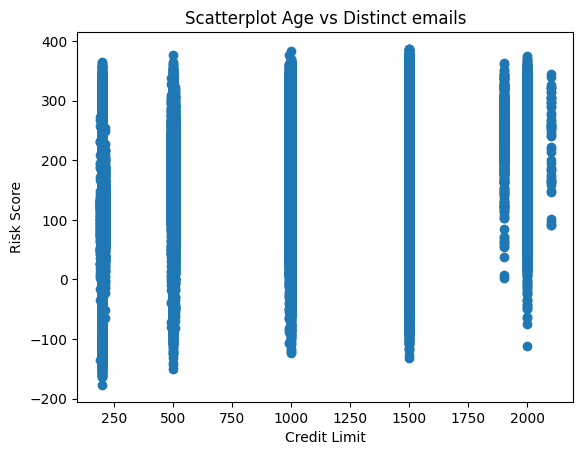

In [ ]:
plt.scatter(df_customers['proposed_credit_limit'], df_customers['credit_risk_score'] )
plt.title('Scatterplot Age vs Distinct emails')
plt.xlabel('Credit Limit')
plt.ylabel('Risk Score')
plt.show()

De la dispersión de ambas variables se encuentra que, efectivamente, en los límites más altos propuestos, es más común que el mínimo de los indices de riesgo sea más alto, lo que indica que en general los riesgos son más altos.

Las variables `customer_age` y `date_of_birth_distinct_emails_4w` presentan una correlación negativa de nivel medio ($-0.56$). Esto quiere decir que se han encontrado casos en donde menor edad implica una mayor cantidad de emails en la misma fecha de nacimiento

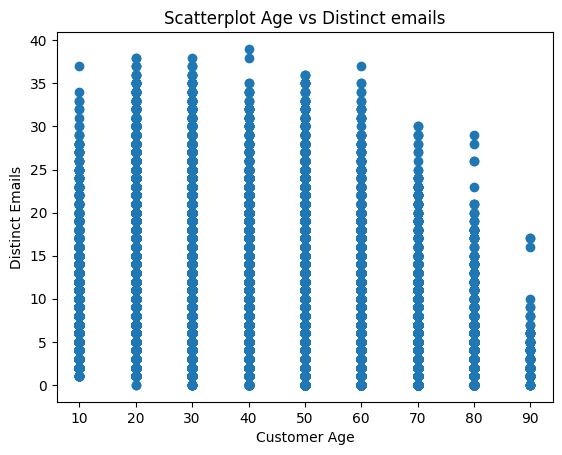

In [ ]:
plt.scatter(df_customers['customer_age'], df_customers['date_of_birth_distinct_emails_4w'] )
plt.title('Scatterplot Age vs Distinct emails')
plt.xlabel('Customer Age')
plt.ylabel('Distinct Emails')
plt.show()

Del scatterplot realizado se puede inferir que, efectivamente, la cantidad de emails distintos es menor para los clientes mayores de 70. Esto se podría explicar por el hecho de que en terminos de muestras, las de menor cantidad son para clientes mayores de 70 años, por lo que claramente la colisión de cumpleaños va a ser menor.

Las variables `month` y `velocity_24h` presentan una correlación negativa de nivel medio ($-0.539$). Esto quiere decir que se han encontrado casos en donde, a medida que avanza el año, hay una menor cantidad de solicitudes por día.

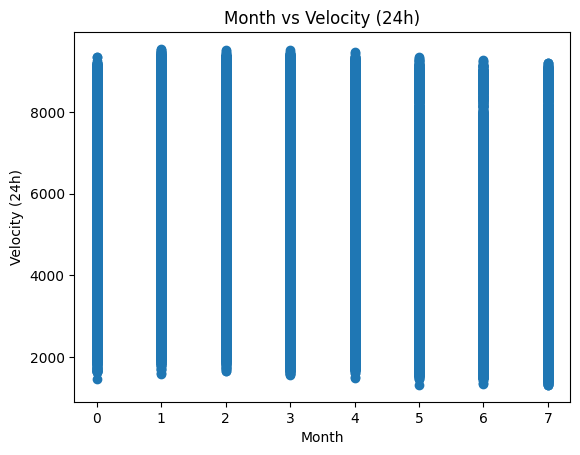

In [ ]:
plt.scatter(df_customers['month'], df_customers['velocity_24h'] )
plt.title('Month vs Velocity (24h)')
plt.xlabel('Month')
plt.ylabel('Velocity (24h)')
plt.show()

Del gráfico de dispersión. Es posible identificar que, a partir del mes 3, los rangos para la variable de velocidad van disminuyendo gradualmente con el pasar de los meses.

#### **Resumen de observaciones**



- La gran mayoría de variables discretas, como `fraud_bool` y `prev_address_months_count`,  y categoricas, como `employment_status` y `source`,  presentan un desbalance fuerte en su distribución.
- Hay variables, como `zip_count_4w` y `current_address_months_count`, que siguen una distribución decreciente. Estas suelen ser variables que cuentan frecuencias y períodos de tiempo. 
- Respecto a la variable objetivo `fraud_bool`, no existe ninguna variable con la que tenga una correlación alta o media.
- Existen multiples variables que utilizan valores negativos para indicar valores faltantes.
- Hay algunas variables que poseen outliers, como `bank_branch_count_8w` y `days_since_request`.
- Es de notar que no hay valores faltantes en formato *nan* después de la limpieza de la parte 2.

## 4. Preprocesamiento

Durante la exploración de datos se han encontrado variables que si bien abarcan un rango amplio de valores, su distribución de concentra en un extremo, como por ejemplo, las variables `days_since_request` y `bank_branch_count_8w`. En este contexto, y dado que se busca aplicar la misma transformación a todas las variables numéricas a escalar, se considera apropiado aplicar un escalado menos sensible a outliers, por lo que en este caso se optará por aplicar un **Robust Scaler** a las variables numéricas.

 Respecto a las variables que utilizan valores negativos para indicar datos faltantes, se decide no eliminar ninguna fila que contenga valores negativos de dicho tipo, principalmente porque se considera que la presencia de valores faltantes podría ser útil para identificar anomalías, además que eliminar alguna de las muestras podría significar perdida de información sobre casos de fraude.

Respecto a las variables categoricas, estas se deben traspasar a un valor numérico para que sea posible trabajar con ellas con modelos matematicos. En este caso se decide utilizar la técnica *One-Hot Encoding*, para evitar representar las categorías en una escala continua.

Adicionalmente, se eliminará la variable `device_fraud_count`, debido a que es una columna constante, por lo que realmente no añade información adicional de utilidad.

Se conservarán sin cambios las siguientes columnas:
- `fraud_bool`: Debido a que es la variable objetivo, y es binaria, no tiene sentido transformarla.
- `segmentacion_etaria`: Debido a que es de interés dividir en grupos etarios los datos, además de que cualquier información relacionada con la edad ya se tiene de forma numérica en la columna `costumer_age`.
- `id`: Pues no tiene sentido aplicar una transformación a esta variable.
- Cualquier variable numérica binaria, dado que no tiene sentido aplicar un escalado a estas.

### 4.1 Declarar `ColumnTransformer`

Tomando en cuenta el preprocesamiento ya descrito, este se implementa mediante un `ColumnTransformer` de sklearn.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

In [ ]:
numeric_cols = df_customers.dtypes[df_customers.dtypes!='object'].index
positive_numeric = df_customers[df_customers[numeric_cols]>=0].dropna(how='any', axis=1)
# Para cachar cuales son las positivas
positive_numeric.columns

Index(['id', 'fraud_bool', 'income', 'customer_age', 'days_since_request',
       'zip_count_4w', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request',
       'keep_alive_session', 'device_fraud_count', 'month',
       'name_email_similarity', 'date_of_birth_distinct_emails_4w',
       'email_is_free', 'phone_home_valid', 'phone_mobile_valid'],
      dtype='object')

In [ ]:
# Para cachar cuales tienen negativos
negative_numeric_features = [x for x in numeric_cols if not x in positive_numeric.columns]

In [ ]:
categorical_columns = ["payment_type","employment_status", "housing_status", 'device_os', 'source']
# Se definen manualmente porque algunas positivas no deben escalarse
positive_numeric_features = ['customer_age', 'days_since_request',
                             'zip_count_4w', "proposed_credit_limit",  'velocity_24h',
                             'velocity_4w', 'bank_branch_count_8w',"month", "date_of_birth_distinct_emails_4w"
                             ,'income', 'name_email_similarity']

ct = ColumnTransformer(
     [("categoric_encoding", OneHotEncoder(sparse_output=False), categorical_columns),
      ("numeric_scaling", RobustScaler(), positive_numeric_features +negative_numeric_features),
      ("F", 'drop', ['device_fraud_count'])],
     sparse_threshold=0,
     remainder='passthrough',
     verbose_feature_names_out= False
     )

ct.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                  transformers=[('categoric_encoding',
                                 OneHotEncoder(sparse_output=False),
                                 ['payment_type', 'employment_status',
                                  'housing_status', 'device_os', 'source']),
                                ('numeric_scaling', RobustScaler(),
                                 ['customer_age', 'days_since_request',
                                  'zip_count_4w', 'proposed_credit_limit',
                                  'velocity_24h', 'velocity_4w',
                                  'ba...month',
                                  'date_of_birth_distinct_emails_4w', 'income',
                                  'name_email_similarity',
                                  'prev_address_months_count',
                                  'current_address_months_count',
                                  'intended_balcon_amount', 'velocity_6h',
                                  'credit_risk_score', 'bank_months_count',
                                  'session_length_in_minutes', 'x1', 'x2',
                                  'device_distinct_emails_8w']),
                                ('F', 'drop', ['device_fraud_count'])],
                  verbose_feature_names_out=False)

### 4.2 Transformar datos

Una vez implementado, se aplica a los datos.

In [ ]:
df_trans = ct.fit_transform(df_customers)  

In [ ]:
df_trans.head()

,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,...,device_distinct_emails_8w,id,fraud_bool,has_other_cards,foreign_request,keep_alive_session,email_is_free,phone_home_valid,phone_mobile_valid,segmentacion_etaria
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,729517,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Persona Mayor
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,149585,0.0,1.0,0.0,1.0,1.0,1.0,1.0,Adulto
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,64486,0.0,1.0,0.0,1.0,0.0,0.0,1.0,Adulto
5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,825283,0.0,0.0,0.0,1.0,0.0,0.0,1.0,Adulto
7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,8308,0.0,1.0,0.0,1.0,1.0,0.0,0.0,Adulto


## 5. Visualización en Baja Dimensionalidad

Con el objetivo de encontrar patrones y/o anomalías, se visualizarán los datos en dimensionalidad reducida.

### 5.1 Muestrear dataframe

Debido a la gran cantidad de muestras, el poder de computo requerido para la reducción de dimensionalidad puede ser relativamente alto. Para evitar problemas de rendimiento, se seleccionará un conjunto más pequeño

Si bien las proyecciones no deben considerar la variable `fraud_bool` para evitar sesgos en los datos, para el muestreo se considera apropiado utilizar una muestra representativa del dataset respecto a la variable objetivo, osea, tener una muestra que mantenga la proporción entre casos de fraude. Para ello se utiliza la función `train_test_split` de sklearn, la que permite obtener una muestra representativa del dataset en base a la variable `fraud_bool`.

In [ ]:
from sklearn.model_selection import train_test_split
n_subsamples = 20000
n_samples = len(df_trans)
X_trans = df_trans.drop(columns = ['fraud_bool'])
y_trans = df_trans['fraud_bool']
X_subsamp, _, y_subsamp, _ = train_test_split(X_trans, y_trans, 
                                              train_size = n_subsamples/n_samples, random_state=42, stratify = y_trans)
y_subsamp = y_subsamp.reset_index(drop=True)

In [ ]:
print(f"Número de muestras obtenidas: {len(X_subsamp)}")
print(f"Proporción de casos de fraude (subsamp): {y_subsamp.sum()/len(y_subsamp)}")
print(f"Proporción de casos de fraude (completo): {y_trans.sum()/(len(y_trans))}")

Número de muestras obtenidas: 20000
Proporción de casos de fraude (subsamp): 0.011
Proporción de casos de fraude (completo): 0.01101203862339217


### 5.2 Proyectar y agregar proyecciones al dataframe de muestreo

Se reduce la muestra a 2 dimensiones mediante la técnica PCA, con el objetivo de visualizar la distribución de los datos.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2)
# Se guarda la segmntacion etaria porque se quiere utilizar para las visualizaciones
segmentacion_subsamp = X_subsamp['segmentacion_etaria']
segmentacion_subsamp = segmentacion_subsamp.reset_index(drop=True)

x_pca = X_subsamp.drop(columns = ['segmentacion_etaria'])
pca.fit(x_pca)

PCA(n_components=2)

In [ ]:
x_pca = pca.transform(x_pca)
# Convertir a dataframe
x_pca = pd.DataFrame(x_pca, columns = ['d1','d2'])
# Volver a concatenar la segmentacion etaria e indice de fraude
y_subsamp = y_subsamp.reset_index(drop=True)
x_pca  = pd.concat([x_pca, segmentacion_subsamp, y_subsamp], axis=1)
x_pca.sample(5)

,d1,d2,segmentacion_etaria,fraud_bool
12456,130315.863054,-40.861313,Adulto,0.0
4739,377745.863023,-36.924456,Adulto,0.0
17852,54438.863068,-42.348004,Adulto,0.0
7266,-370310.136878,-49.132626,Adulto,0.0
16995,-400936.136890,-48.078819,Adulto,0.0


### 5.3 Visualizar según rangos etarios

Se tiene el supuesto de que el comportamiento de los clientes puede variar dependiendo de su rango etario, es por ello que se visualizarán las muestras en dimensionalidad reducida dependiendo del rango etario de los clientes.

In [ ]:
import plotly.express as px
def show_scatter_pca(df, segmentacion = 'Adulto', color_label='fraud_bool' ):
  '''
  df: DataFrame con columnas "d1", "d2", "segmentacion_etaria" y "fraud_bool"
  segmentacion: String. Para saber que segmentacion etaria utilizar
  color_label: String. Nombre de columna usada para el coloreo de puntos, debe indicar fraude (o predicción de este).
  '''
  df_seg = df[df['segmentacion_etaria']==segmentacion]
  fig = px.scatter(df_seg, x="d1", y="d2", color=color_label, title=f'Fraudes en grupo etario: {segmentacion}',
                 labels = {color_label:'Fraude'}, color_continuous_scale='Bluered_r')
  fig.show()


#### Adulto Mayor

In [ ]:
show_scatter_pca(x_pca, 'Persona Mayor')

#### Adulto

In [ ]:
show_scatter_pca(x_pca)

#### Adulto Joven

In [ ]:
show_scatter_pca(x_pca, 'Adulto-Joven')

#### Joven

In [ ]:
show_scatter_pca(x_pca, 'Joven')

#### Análisis

En general, es de notar que existen más casos de fraude para los rangos etarios de mayor edad. También es interesante observar que, en general, los casos de fraude no suelen ser outliers evidentes, pues suelen estar en posiciones similares a los casos normales. En particular, aquellos puntos que pueden considerarse outliers, pues se alejan de la distribución principal de los datos, suelen ser puntos normales que no corresponden a un caso de fraude.

## 6. Anomalías

Para detectar posibles fraudes, dado que los intentos de fraude son una porción muy pequeña de los datos y en general hay grandes desbalances en algunas variables, se tratará cualquier anomalía como un intento de fraude. En este contexto, se entrenarán modelos de detección de anomalías en base a la muestra del dataset previamente obtenido, y posteriormente se comparará con la data existente de intentos de fraude.

En este caso, se considera prudente utilizar métodos populares de detección de anomalías. En particular se utilizan los siguientes:
- **Isolation Forest**: Algoritmo no supervisado basado en árboles de decisión. El algoritmo califica como outliers a los ejemplos que se encuentran en las ramas más cortas del árbol, dado que son las muestras más faciles de distinguir del resto.
- **Local Outlier Factor**: Algoritmo no supervisado que detecta outliers en base a la densidad de un punto respecto a sus vecinos, en particular, califica como outliers a aquellos puntos con baja densidad.

### 6.1 Implementar detector de anomalías sobre dataframe de muestreo

En primer lugar, se entrenan los algoritmos con la muestra del dataset utilizada previamente, esto para evitar tiempos de entrenamiento muy largos.

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
# Desactivar warning molesta
pd.options.mode.chained_assignment = None
# Entrenar un detector de anomalías por grupo etario y concatenar predicciones
predicts = ['predict_forest', 'predict_lof']
grupos = X_subsamp['segmentacion_etaria'].unique()
for grupo in grupos:
  X_subsamp_etario = X_subsamp[X_subsamp['segmentacion_etaria']==grupo]
  X_for_train = X_subsamp_etario.drop(columns = ['segmentacion_etaria']+predicts, errors = 'ignore')
  # Añadir a muestra
  X_subsamp.loc[X_subsamp_etario.index, 'predict_forest'] = IsolationForest(random_state=42).fit_predict(X_for_train)
  X_subsamp.loc[X_subsamp_etario.index, 'predict_lof'] = LocalOutlierFactor().fit_predict(X_for_train)
  # Reemplazar etiquetas de predicciones por etiquetas de fraude
X_subsamp[predicts] = X_subsamp[predicts].replace({1:0, -1:1})

### 6.2 Agregar resultados a dataframe de muestreo

Se agregan las predicciones a la muestra con reducción de dimensionalidad aplicada, para facilitar la visualización de las predicciones hechas.

In [ ]:
x_pca2 = pd.concat([x_pca, X_subsamp[predicts].reset_index(drop=True)], axis=1)
x_pca2.head()

,d1,d2,segmentacion_etaria,fraud_bool,predict_forest,predict_lof
0,380443.863042,-38.095614,Adulto,0.0,0.0,0.0
1,298798.863045,-38.973331,Adulto-Joven,0.0,0.0,0.0
2,-9033.136911,-43.039373,Adulto,0.0,0.0,0.0
3,3061.863087,-43.919696,Joven,0.0,0.0,0.0
4,-39932.136911,-44.397391,Adulto,0.0,0.0,0.0


### 6.3 Visualizar según rangos etarios

A continuación se visualizan las predicciones realizadas por los detectores de anomalías

#### Isolation Forest

##### Adulto Mayor

In [ ]:
show_scatter_pca(x_pca2, 'Persona Mayor', 'predict_forest')

##### Adulto

In [ ]:
show_scatter_pca(x_pca2, 'Adulto', 'predict_forest')

##### Adulto Joven

In [ ]:
show_scatter_pca(x_pca2, 'Adulto-Joven', 'predict_forest')

##### Joven

In [ ]:
show_scatter_pca(x_pca2, 'Joven', 'predict_forest')





#### Local Outlier Factor

##### Adulto Mayor

In [ ]:
show_scatter_pca(x_pca2, 'Persona Mayor', 'predict_lof')

##### Adulto

In [ ]:
show_scatter_pca(x_pca2, 'Adulto', 'predict_lof')

##### Adulto Joven

In [ ]:
show_scatter_pca(x_pca2, 'Adulto-Joven', 'predict_lof')

##### Joven

In [ ]:
show_scatter_pca(x_pca2, 'Joven', 'predict_lof')

#### Análisis

De las visualizaciones se hace evidente que el algoritmo Isolation Forest tiende a calificar como anomalía a una cantidad de muestras mucho mayor a la real. Por otro lado, el algoritmo Local Outlier Factor no es capaz de detectar ninguna anomalía, exceptuando para el rango etario "Adulto", en donde califica a muchas muestras como outliers, es por este rendimiento deficiente que no se considerará este algoritmo para las métricas de evaluación.

### 6.4 Calcular ratios y responder

Se evaluará el rendimiento de la detección de fraudes con Isolation Forest mediante las siguientes métricas:
 - **Precision**: Es el ratio de verdaderos positivos entre verdaderos positivos y falsos positivos. En este caso, sería la cantidad de ejemplos predichos correctamente como fraude / cantidad total de datos predichos como fraude. Esta métrica va desde 0 hasta 1, en donde un valor más alto es mejor.
 - **Recall**: Es el ratio de verdaderos positivos entre los verdaderos positivos y falsos negativos (decir 0, era 1). En este caso, sería la cantidad de ejemplos predichos correctamente como fraude / cantidad total de ejemplos que eran realmente fraude. Esta métrica va desde 0 hasta 1, en donde un valor más alto es mejor. 


 En términos más simples, precision alta implica un rendimiento alto relativo al detector/clasificador, mientras que un recall alto implica un rendimiento alto relativo a los datos

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
y_true = x_pca2['fraud_bool']
y_pred = x_pca2['predict_forest']
print('Métricas generales')
print(f"Precision:\t {precision_score(y_true, y_pred)}")
print(f"Recall:   \t {recall_score(y_true, y_pred)}")

Métricas generales
Precision:	 0.01772525849335303
Recall:   	 0.21818181818181817


In [ ]:
print('Métricas por grupo etario')
for grupo in x_pca2['segmentacion_etaria'].unique():
  print(f'Grupo: {grupo}')
  grupo_etario = x_pca2[x_pca2['segmentacion_etaria']==grupo]
  y_true = grupo_etario['fraud_bool']
  y_pred = grupo_etario['predict_forest']
  print(f"Precision:\t {precision_score(y_true, y_pred)}")
  print(f"Recall:   \t {recall_score(y_true, y_pred)}")

Métricas por grupo etario
Grupo: Adulto
Precision:	 0.018643190056965304
Recall:   	 0.2222222222222222
Grupo: Adulto-Joven
Precision:	 0.02056555269922879
Recall:   	 0.4
Grupo: Joven
Precision:	 0.0
Recall:   	 0.0
Grupo: Persona Mayor
Precision:	 0.0113314447592068
Recall:   	 0.1111111111111111


Las métricas obtenidas en general son bastante bajas. En particular destaca que siempre se obtiene un recall más alto que el valor de precision para el respectivo grupo etario, esto significa que en general se logra acertar a una cantidad relativamente mayor de fraudes, a costa de detectar una gran cantidad de fraudes de forma erronea.

Destaca fuertemente el recall para el grupo de "Adulto Joven", en donde se tiene el valor de recall más alto, mientras que para los grupos de mayor edad estos son bastante más bajos. Una posible explicación es que el detector de anomalías etiqueta a muchos ejemplos como anomalías, por lo que en el grupo "Adulto Joven", en el que hay relativamente menos casos de fraude, es mucho más común que acierte a una cantidad relativamente alta de casos de fraude. 

También destacan las pesimas métricas para el grupo "Joven", en donde tanto Precision como Recall son 0. La explicación es que el algoritmo "Isolation Forest" para el grupo "Joven" no califica tantas muestras como outliers, si además se toma en cuenta que este grupo posee la menor cantidad de casos de fraude, no es extraño que el algoritmo no acierte a ningún caso.

## Conclusiones

Es evidente que la metodología escogida no es óptima y tiene un gran margen de mejora. En particular, en un principio, y tomando en cuenta las visualizaciones creadas, no parece que un caso de fraude pueda ser detectado como una anomalía, debido a que en la distribución de los datos no es tan evidente que un caso de fraude sea tan facilmente distinguible de un caso normal. 

Sobre los resultados obtenidos, es evidente que los algoritmos entrenados no logran identificar bien los casos de fraude. Para poder entrenar un mejor modelo de detección de fraude, se podría tomar un enfoque más orientado a la clasificación binaria y el balance de datos. En este contexto, por ejemplo, en lugar de considerar un caso de fraude como anomalía, podría aplicarse un técnica de undersampling sobre la clase dominante, y a partir de dicho balance entrenar un clasificador tradicional. 

Por último, se podrían intentar otro tipo de técnicas de preprocesado. En particular se utilizó un escalado robusto debido a la presencia de outliers en algunos datos, sin embargo también se podría haber intentado utilizar un escalado **MinMax** o un escalado **MaxAbs**, de forma que todas las variables fueran comparables en un mismo dominio, como por ejemplo, $[-1,1]$, aunque en este caso los valores más pequeños de variables con outliers habrían terminado con valores muy cercanos a cero. También se podría haber realizado una selección de caracteristicas mediante alguna técnica estadística que determinara la importancia de ciertas variables respecto a la variable objetivo.